# Review of previous discussion

https://spark.apache.org/docs/latest/rdd-programming-guide.html#resilient-distributed-datasets-rdds
    
We went over the RDDs (Resilient Distributed Datasers) and Parallelized collections.

# What is RDD?

- RDD is a collection of elements partitioned across the nodes of cluster the can be operated in parallel.
- RDD is created by starting with a file in the Hadoop file system or any other Hadoop supported file system 
or an existing Scala collections in the driver program and transforming it.

# What is Data Frame (Dataset)?

https://spark.apache.org/docs/latest/sql-programming-guide.html
    
- Data Frames are essentially a dataset.
- Datasets is a distributed collection of data.
- The dataset is a new interface added that was actually added in Spark 1.6 that provides the benefits of RDDs, such as, strong typing and 
the use of lambda funcitons with the benefits of Sparks SQL optimization and execution engine.

# Difference between RDD, Data Frame (Dataset)?

- RDD: RDD is a distributed collection of data elements spread across many machines in the cluster. 
RDDs are a set of Java or Scala objects representing data. 

- DataFrame: A DataFrame is a distributed collection of data organized into named columns. 
It is conceptually equal to a table in a relational database.

https://stackoverflow.com/questions/31508083/difference-between-dataframe-dataset-and-rdd-in-spark
    
- When you use RDDs, you want to perform the transformations and actions on unstructured data.
- Remember, RDDs do not have schema. Your data frame have schema. 
- So, RDDs do not really care about imposing schema when you are running attributes through your data.
- One thing about the drawback of using an RDD compared to a data frame is that
- By using RDD, you are not necessarily having the performance benefits that structured schema data would have. 
- You are going to use functional program method with RDDs but 
- you have the ability to switch to data frame if you have an RDD.
- You can go from RDDs to Data Frame and you can go from Data frame to RDD.

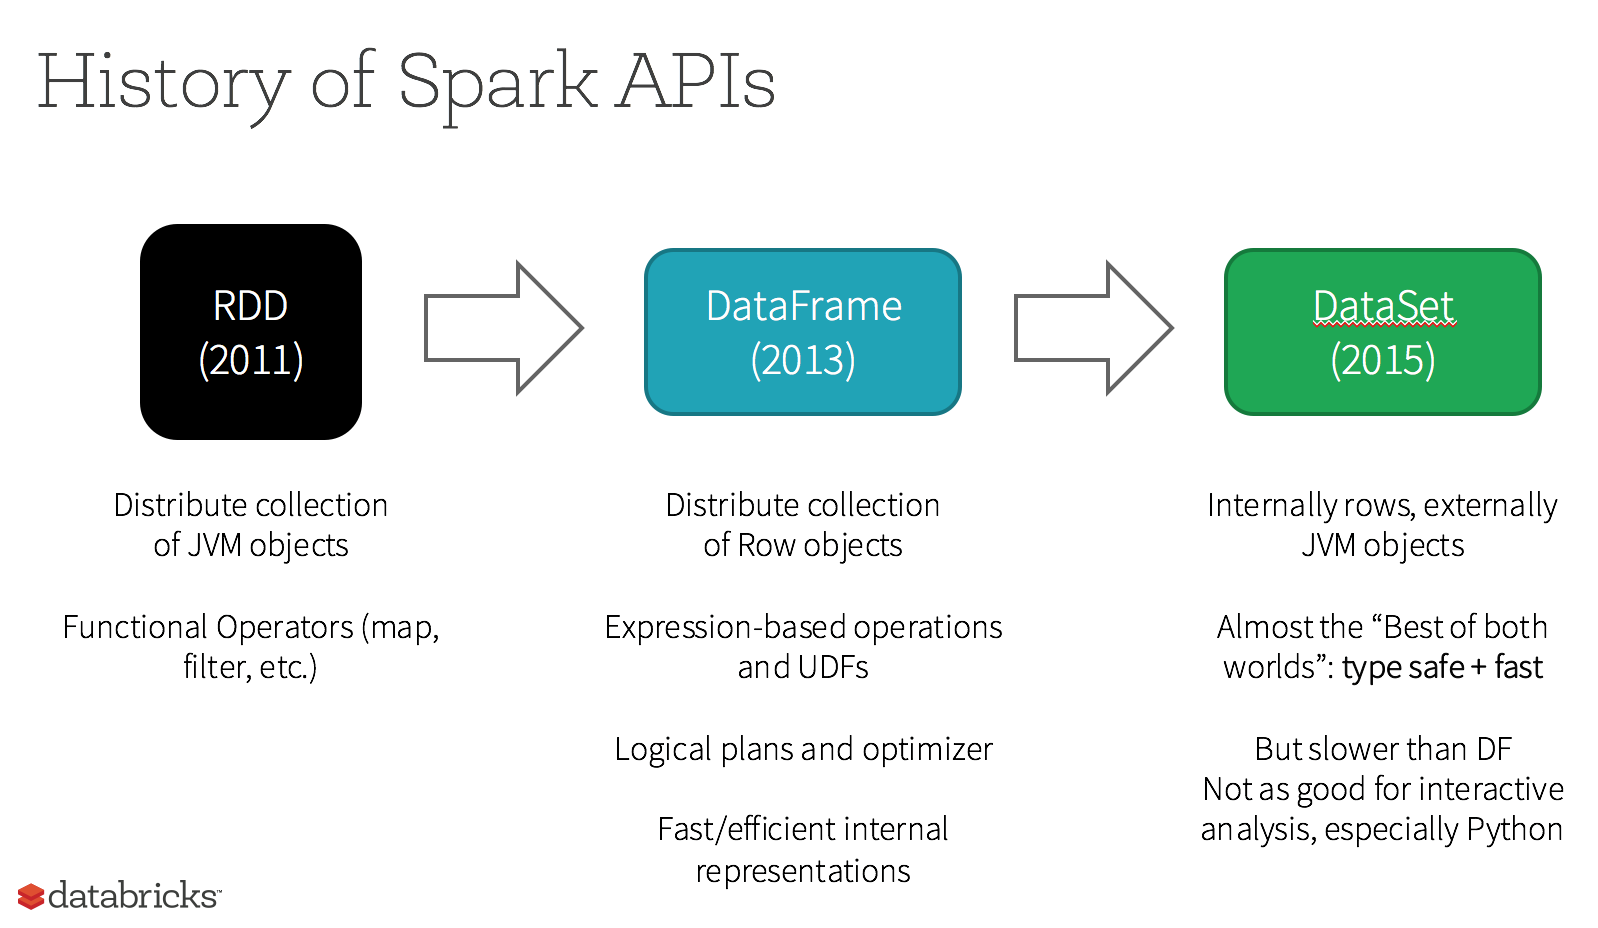

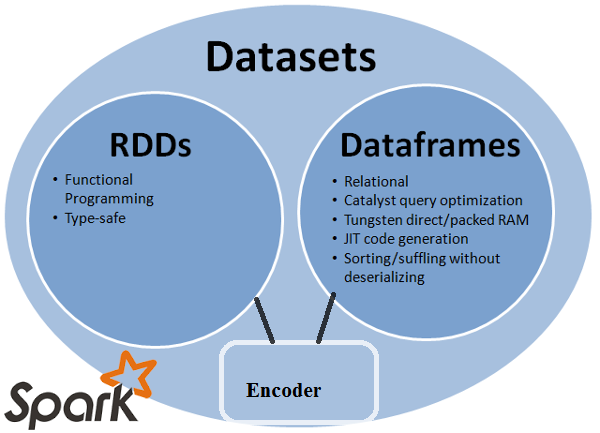

# California Housing Information

Download California Housing information from the following web site:

https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html


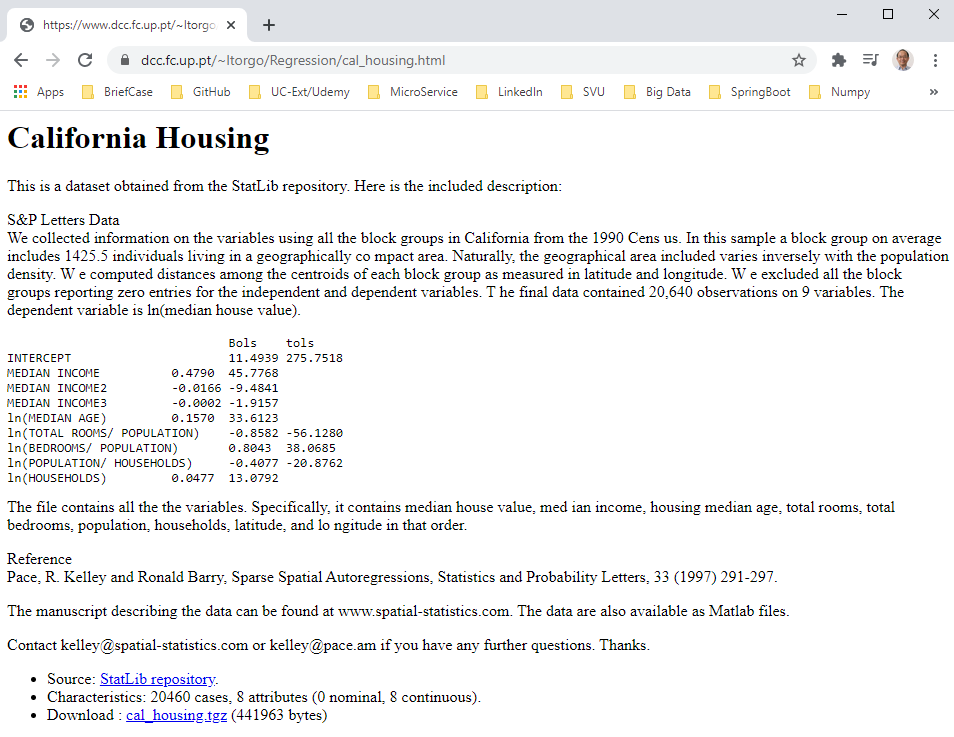

# House Columns and Data 

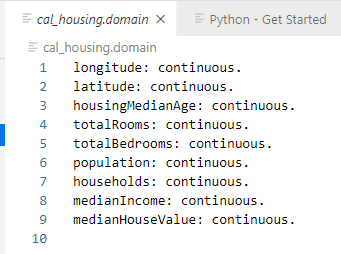

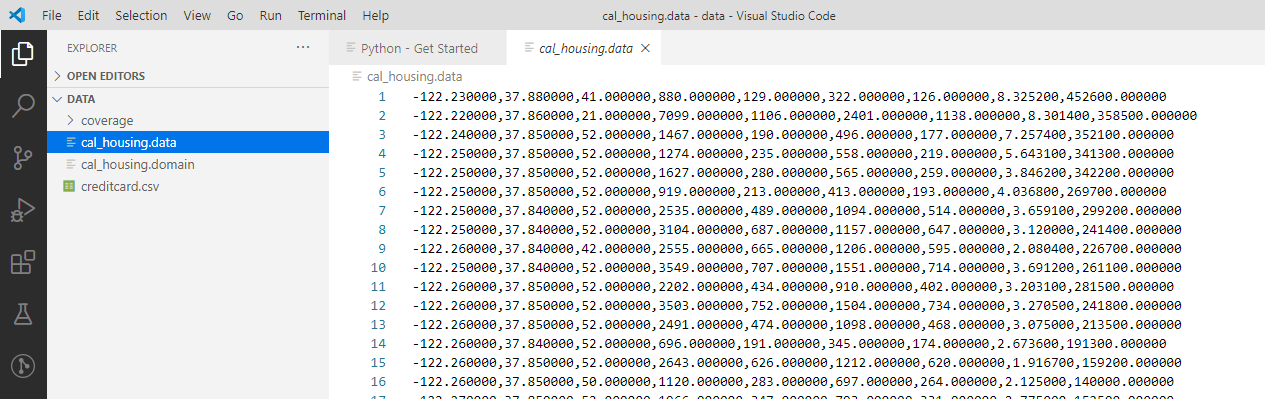

# Display the Columns and Count of Dataframe

In [9]:
from pyspark.sql import SparkSession
# Build Sessnion
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", 'Some-value') \
        .getOrCreate()

sc = spark.sparkContext
# https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
# cal_housing.tgz
rdd = sc.textFile('../csv_data/cal_housing.data')

from pyspark.sql import Row
df = rdd.map(lambda line: Row(longitude=line[0], 
                            latitude=line[1], 
                            housingMedianAge=line[2],
                            totalRoom=line[3],
                            totalBedrooms =line[4],
                            population = line[5],
                            households = line[6],
                            medianIncome=line[7],
                            medianHouseValue=line[8])).toDF()

print("df.columns:")
print(df.columns)
print()
print('df.count():')
print(df.count())
print()

df.columns:
['longitude', 'latitude', 'housingMedianAge', 'totalRoom', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']

df.count():
20640



# Display DataFrame Information

In [5]:
from pyspark.sql import SparkSession
# Build Sessnion
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", 'Some-value') \
        .getOrCreate()

sc = spark.sparkContext
# https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
# cal_housing.tgz
rdd = sc.textFile('../csv_data/cal_housing.data')

from pyspark.sql import Row

df = rdd.map(lambda line: Row(longitude=line[0], 
                              lattitude=line[1], 
                              housingMedianAge=line[2],
                              totalRoom=line[3],
                              totalBedrooms =line[4],
                              population = line[5],
                              households = line[6],
                              medianIncome=line[7],
                              medianHouseValue=line[8])).toDF()

print('df.describe().show():')
print(df.describe().show())

sc.stop()

df.describe().show():
+-------+---------+--------------------+------------------+------------------+-------------+------------------+------------------+------------+----------------+
|summary|longitude|           lattitude|  housingMedianAge|         totalRoom|totalBedrooms|        population|        households|medianIncome|medianHouseValue|
+-------+---------+--------------------+------------------+------------------+-------------+------------------+------------------+------------+----------------+
|  count|    20640|               20640|             20640|             20640|        20640|             20640|             20640|       20640|           20640|
|   mean|     null|                 1.0|1.3976259689922481| 5.166036821705426|         null|3.8197674418604652|  4.54312015503876|         0.0|             0.0|
| stddev|     null|5.551249498454005...|0.4894192098469657|3.1499808830444445|         null|2.9232932518639436|2.8731404333087864|         0.0|             0.0|
|    min|   

# How to Make Easier to Visualize?

We can use show() method to make better visualization.

In [10]:
from pyspark.sql import SparkSession
# Build Sessnion
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", 'Some-value') \
        .getOrCreate()

sc = spark.sparkContext
# https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
# cal_housing.tgz
rdd = sc.textFile('../csv_data/cal_housing.data')

from pyspark.sql import Row
df = rdd.map(lambda line: Row(longitude=line[0], 
                              latitude=line[1],
                              housingMedianAge=line[2],
                              totalRoom=line[3],
                              totalBedrooms =line[4],
                              population = line[5],
                              households = line[6],
                              medianIncome=line[7],
                              medianHouseValue=line[8])).toDF()

print('df.show():')
print(df.show())    

df.show():
+---------+--------+----------------+---------+-------------+----------+----------+------------+----------------+
|longitude|latitude|housingMedianAge|totalRoom|totalBedrooms|population|households|medianIncome|medianHouseValue|
+---------+--------+----------------+---------+-------------+----------+----------+------------+----------------+
|        -|       1|               2|        2|            .|         2|         3|           0|               0|
|        -|       1|               2|        2|            .|         2|         2|           0|               0|
|        -|       1|               2|        2|            .|         2|         4|           0|               0|
|        -|       1|               2|        2|            .|         2|         5|           0|               0|
|        -|       1|               2|        2|            .|         2|         5|           0|               0|
|        -|       1|               2|        2|            .|         2|     

# Note:

Read the text File is an unstructured data.
The data is read character by character.
The information may not make sense.